In [1]:
import numpy as np
from dtw import dtw
import librosa
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [2]:
def plot_mfccs(mfccs, n_mfcc):
    num_rows, num_cols = mfccs.shape
    t = range(0, num_cols)
    n_mfcc = 3 if n_mfcc < 0 else min(n_mfcc, num_rows)
    colors = cm.rainbow(np.linspace(0, 1, n_mfcc))
    patches = []
    for i in range(0, n_mfcc):
        patch = mpatches.Patch(color=colors[i], label='mfcc #{0:01d}'.format(i))
        patches.append(patch)
    plt.legend(handles=patches, loc='center right')
    for i in range(0, n_mfcc):
        plt.plot(t, mfccs[i], color=colors[i], linewidth=3)
    plt.show()

In [70]:
# constants
freq_min = 500
freq_max = 8000
num_mfccs = 13

In [71]:
buzzard_path_1 = "../../shortBirdiesDTW/trainfile001_buzzard01.wav"
buzz_y_1, buzz_sr_1 = librosa.load(buzzard_path_1)
buzzard_mfccs_1 = librosa.feature.mfcc(y=buzz_y_1, sr=buzz_sr_1, n_mfcc=num_mfccs, fmin=freq_min, fmax=freq_max)

In [72]:
buzzard_path_2 = "../../shortBirdiesDTW/trainfile001_buzzard02.wav"
buzz_y_2, buzz_sr_2 = librosa.load(buzzard_path_2)
buzzard_mfccs_2 = librosa.feature.mfcc(y=buzz_y_2, sr=buzz_sr_2, n_mfcc=num_mfccs, fmin=freq_min, fmax=freq_max)

In [73]:
lark_path_1 = "../../shortBirdiesDTW/trainfile067_crested_lark01.wav"
lark_y_1, lark_sr_1 = librosa.load(lark_path_1)
lark_mfccs_1 = librosa.feature.mfcc(y=lark_y_1, sr=lark_sr_1, n_mfcc=num_mfccs, fmin=freq_min, fmax=freq_max)

In [74]:
lark_path_2 = "../../shortBirdiesDTW/trainfile069_crested_lark01.wav"
lark_y_2, lark_sr_2 = librosa.load(lark_path_2)
lark_mfccs_2 = librosa.feature.mfcc(y=lark_y_2, sr=lark_sr_2, n_mfcc=num_mfccs, fmin=freq_min, fmax=freq_max)

In [8]:
plt.title("Buzzard MFCCs")
plt.xlabel("time tics")
plt.ylabel("Coefficient Value")

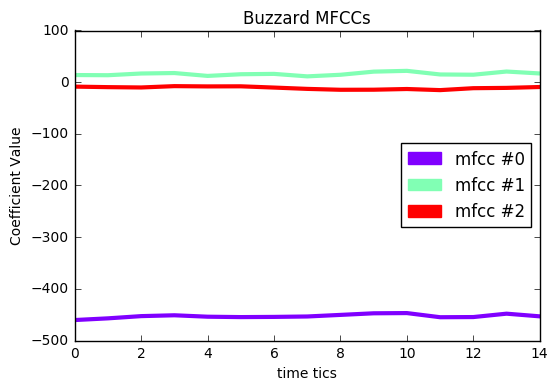

In [9]:
plot_mfccs(buzzard_mfccs_1, n_mfcc=3)

In [10]:
plt.title("Lark MFCCs")
plt.xlabel("time tics")
plt.ylabel("Coefficient Value")

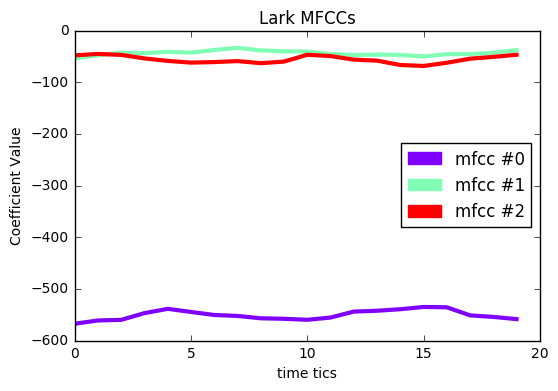

In [11]:
plot_mfccs(lark_mfccs_1, n_mfcc=3)

In [12]:
plt.clf()

In [15]:
nth_mfcc = 2
buzz_mfcc_1_first_row = buzzard_mfccs_1[nth_mfcc].reshape(-1, 1)
buzzard_mfcc_2_first_row = buzzard_mfccs_2[nth_mfcc].reshape(-1, 1)
lark_mfccs_1_first_row = lark_mfccs_1[nth_mfcc].reshape(-1, 1)
lark_mfccs_2_first_row = lark_mfccs_2[nth_mfcc].reshape(-1, 1)

In [16]:
dist1, cost1, acc1, path1 = dtw(buzz_mfcc_1_first_row, buzzard_mfcc_2_first_row, dist=lambda a, b: np.linalg.norm(a - b, ord=1))

In [17]:
print(dist1)

1.8116574234


In [18]:
dist2, cost2, acc2, path2 = dtw(buzz_mfcc_1_first_row, lark_mfccs_1_first_row, dist=lambda a, b: np.linalg.norm(a - b, ord=1))

In [19]:
print(dist2)

25.0897684005


In [20]:
dist3, cost3, acc3, path3 = dtw(buzz_mfcc_1_first_row, lark_mfccs_2_first_row, dist=lambda a, b: np.linalg.norm(a - b, ord=1))

In [21]:
print(dist3)

24.6084196098


In [22]:
dist4, cost4, acc4, path4 = dtw(lark_mfccs_1_first_row, lark_mfccs_2_first_row, dist=lambda a, b: np.linalg.norm(a - b, ord=1))

In [23]:
print(dist4)

1.38953380955


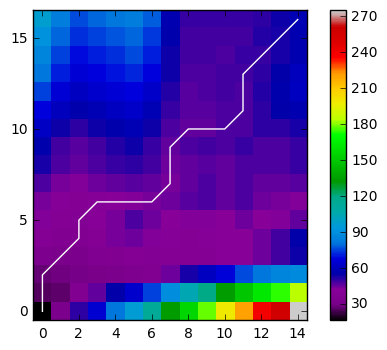

In [37]:
plt.imshow(acc1.T, origin='lower', cmap='nipy_spectral', interpolation='nearest')
plt.plot(path1[0], path1[1], 'w')
plt.xlim((-0.5, acc1.shape[0]-0.5))
plt.ylim((-0.5, acc1.shape[1]-0.5))
plt.colorbar()
plt.show()

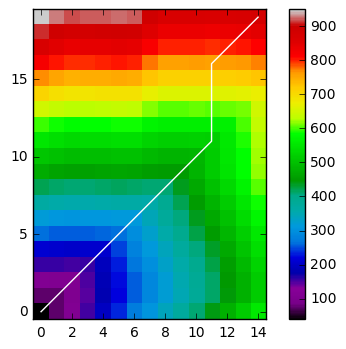

In [38]:
plt.imshow(acc2.T, origin='lower', cmap="nipy_spectral", interpolation='nearest')
plt.plot(path2[0], path2[1], 'w')
plt.xlim((-0.5, acc2.shape[0]-0.5))
plt.ylim((-0.5, acc2.shape[1]-0.5))
plt.colorbar()
plt.show()

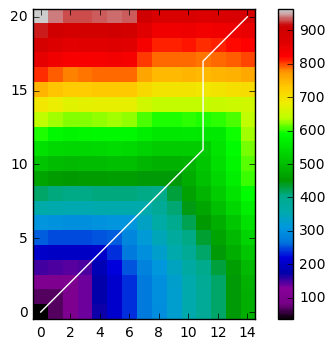

In [41]:
plt.imshow(acc3.T, origin='lower', cmap='nipy_spectral', interpolation='nearest')
plt.plot(path3[0], path3[1], 'w')
plt.xlim((-0.5, acc3.shape[0]-0.5))
plt.ylim((-0.5, acc3.shape[1]-0.5))
plt.colorbar()
plt.show()

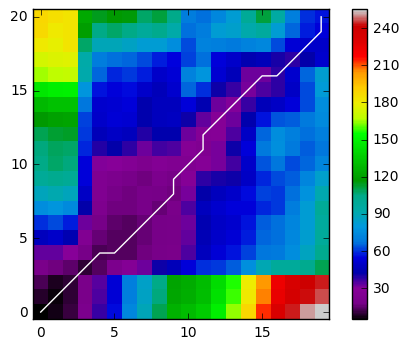

In [42]:
plt.imshow(acc4.T, origin='lower', cmap='nipy_spectral', interpolation='nearest')
plt.plot(path4[0], path4[1], 'w')
plt.xlim((-0.5, acc4.shape[0]-0.5))
plt.ylim((-0.5, acc4.shape[1]-0.5))
plt.colorbar()
plt.show()

In [81]:
n_mfcc_for_dtw = 10

In [82]:
# now lets see if we can do it for all n mfccs
dist11, cost11, acc11, path11 = dtw(buzzard_mfccs_1[:n_mfcc_for_dtw].T, buzzard_mfccs_2[:n_mfcc_for_dtw].T, dist=lambda a, b: np.linalg.norm(a - b, ord=1))
print(dist11)

19.1304606799


In [83]:
dist22, cost22, acc22, path22 = dtw(buzzard_mfccs_1[:n_mfcc_for_dtw].T, lark_mfccs_1[:n_mfcc_for_dtw].T, dist=lambda a, b: np.linalg.norm(a - b, ord=1))
print(dist22)

145.068804407


In [91]:
dist33, cost33, acc33, path33 = dtw(lark_mfccs_1[:n_mfcc_for_dtw].T, lark_mfccs_2[:n_mfcc_for_dtw].T, dist=lambda a, b: np.linalg.norm(a - b, ord=1))
print(dist33)

34.6229380881


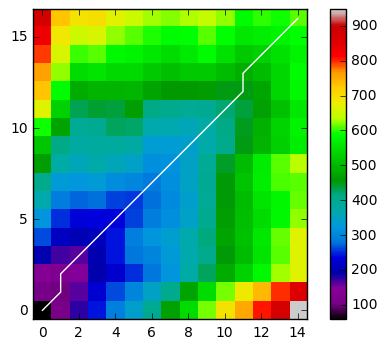

In [89]:
plt.imshow(acc11.T, origin='lower', cmap='nipy_spectral', interpolation='nearest')
plt.plot(path11[0], path11[1], 'w')
plt.xlim((-0.5, acc11.shape[0]-0.5))
plt.ylim((-0.5, acc11.shape[1]-0.5))
plt.colorbar()
plt.show()

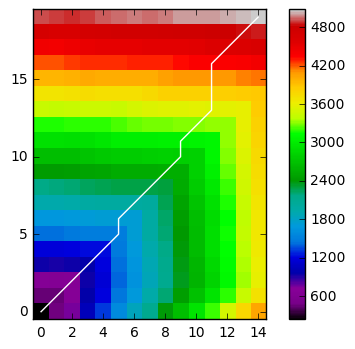

In [90]:
plt.imshow(acc22.T, origin='lower', cmap='nipy_spectral', interpolation='nearest')
plt.plot(path22[0], path22[1], 'w')
plt.xlim((-0.5, acc22.shape[0]-0.5))
plt.ylim((-0.5, acc22.shape[1]-0.5))
plt.colorbar()
plt.show()

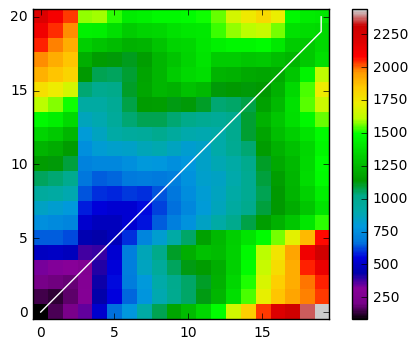

In [92]:
plt.imshow(acc33.T, origin='lower', cmap='nipy_spectral', interpolation='nearest')
plt.plot(path33[0], path33[1], 'w')
plt.xlim((-0.5, acc33.shape[0]-0.5))
plt.ylim((-0.5, acc33.shape[1]-0.5))
plt.colorbar()
plt.show()